# 0. Importing library

In [7]:
# feature extracting and data preprocessing
import librosa
import librosa.display
from pathlib import Path
import os
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

import warnings
warnings.filterwarnings('ignore')

# 1. Preprocess

## (1) Data Extraction

### 1) Spectrogram

In [ ]:
# data extracting -- converting .wav to .png
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    Path(f'./data_img/{g}').mkdir(parents=True, exist_ok=True)                  # creating new directory for data 
    for filename in os.listdir(f'./genres/{g}'):
        if filename.endswith('.wav'):                                           # determine if the file is .wav file 
            song = f'./genres/{g}/{filename}'                                   # obtaining audio file's path
            x, sr = librosa.load(song, mono = True, duration=5)                    # loading audio(5s, original sr is 22050)
            X = librosa.stft(x)                                                     # standarization
            Xdb = librosa.amplitude_to_db(abs(X))
            spec=librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')  # getting spectrogram
            plt.axis('off')                                                         # delete axis from the figure
            plt.savefig(f'./data_img/{g}/{filename[:-4]}.png')                      # save image as data
            plt.clf()                                                               # don't display   

### 2) Features:

* Mel-frequency cepstral coefficients (MFCC)(100 in number)
* Spectral Centroid,
* Zero Crossing Rate
* Chroma Frequencies
* Spectral Roll-off.

In [2]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth spectral_rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'    # 20 mfccs
header += ' label'
header = header.split()

In [3]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

file = open('data.csv', 'w')        # 'w'--create(if not exist), open and write from start
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for g in genres:
    for filename in os.listdir(f'./genres/{g}'):
        if filename.endswith('.wav'):
            song = f'./genres/{g}/{filename}'                               
            x, sr = librosa.load(song, duration=10)           # use the first 10s
            chroma_stft = librosa.feature.chroma_stft(x, sr)
            rmse = librosa.feature.rms(x)
            spec_cent = librosa.feature.spectral_centroid(x, sr)
            spec_bw = librosa.feature.spectral_bandwidth(x, sr)
            rolloff = librosa.feature.spectral_rolloff(x, sr)
            zcr = librosa.feature.zero_crossing_rate(x, sr)
            mfcc = librosa.feature.mfcc(x, sr)
            to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
            for e in mfcc:
                to_append += f' {np.mean(e)}'          # 20 mfccs
            to_append += f' {g}'                       # label
            file = open('data.csv', 'a')               # 'a'--add(in a new row)
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())

## (2) Data Preprocess (can start from here once .csv file is created!)
1. encode label and scale features
2. split into training data and testing data

In [117]:
from pickle import dump

data = pd.read_csv('data.csv')

genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

scaler = StandardScaler()
x = scaler.fit_transform(np.array(data.iloc[:, 1:-1], dtype=float))

# save scaler
dump(scaler, open('scaler.pkl', 'wb'))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Number of samples: ' + str(x.shape[0]))
print('Number of training samples: ' + str(x_train.shape[0]))
print('Number of testing samples: ' + str(x_test.shape[0]))

Number of samples: 834
Number of training samples: 667
Number of testing samples: 167


In [110]:
x

array([[-6.58702355e-01,  4.34659795e-01, -1.13758390e+00, ...,
        -4.11832142e-01,  1.16140473e+00, -1.16562452e+00],
       [-3.10301677e-02,  5.95471842e-01, -1.90005917e-01, ...,
        -7.43580704e-04, -5.86850777e-01,  1.26346618e+00],
       [ 2.71871390e-01,  2.05815749e+00,  1.15347584e-01, ...,
         5.16479159e-01, -6.23826400e-01, -7.24904623e-01],
       ...,
       [ 8.61182334e-01, -2.01279921e-01,  5.11072177e-01, ...,
        -9.19955335e-01, -2.10762500e-01, -5.61311646e-01],
       [ 3.86666700e-01,  6.65902043e-02, -5.96418579e-01, ...,
        -4.84213989e-01, -8.78330440e-01,  2.23481151e-01],
       [ 1.85601684e-01,  3.42306190e-01, -2.73726074e-02, ...,
         3.14316928e-01,  9.81673706e-02, -3.42963899e-01]])

In [55]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

# 2. Training 
(with different models)

In [40]:
model_name = ['NeuralNetwork', 'LogisticRegression', 'SVM', 'LibSVM',
              'DecisionTree', 'Adaboost', 'RandomForest', 'KNN', 'KNN_dis']
acc = []

## (1) Neural Network

### Ploting Function
Reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [15]:
# Draw learning curves for training and validation

def plot_learning_curve(history):
    
    # list all data in history
    keys = history.history.keys()
    print(keys)
    
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    if 'val_accuracy' in keys:
        plt.plot(history.history['val_accuracy'])
        plt.legend(['train', 'val'], loc='upper left')
    else:
        plt.legend(['train'], loc='upper left')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    if 'val_accuracy' in keys:
        plt.plot(history.history['val_loss'])
        plt.legend(['train', 'val'], loc='upper left')
    else:
        plt.legend(['train'], loc='upper left')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

In [41]:
nn = Sequential()
nn.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
nn.add(Dropout(0.5))
nn.add(Dense(256, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(10, activation='softmax'))

nn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy', 
           metrics=['accuracy'])

nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               6912      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 75,274
Trainable params: 75,274
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


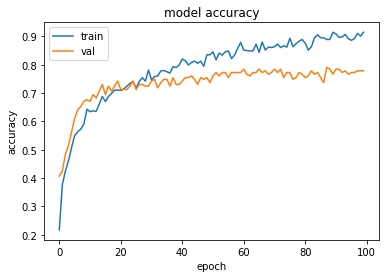

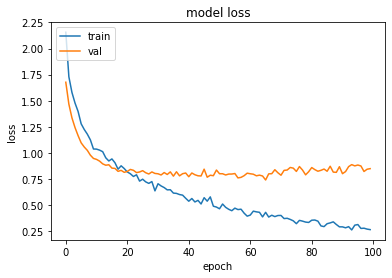

In [42]:
history = nn.fit(x_train, 
                 y_train, 
                 epochs=100,
                 batch_size=32,
                 validation_data=(x_test, y_test),
                 verbose=0)

plot_learning_curve(history)

In [43]:
lo, ac = nn.evaluate(x_test, y_test)

acc.append(ac)

6/6 [==============================] - 0s 2ms/step - loss: 0.8501 - accuracy: 0.7784


### Save Model

In [53]:
nn.save('nn.h5')

### Test

In [54]:
# load model
from keras.models import load_model
 
model = load_model('nn.h5')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               6912      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 75,274
Trainable params: 75,274
Non-trainable params: 0
_________________________________________________________________


In [132]:
# new sample

from pickle import load

def get_sample(data, i):
    return data.iloc[i, 1:-1], data.iloc[i, -1]

sample_feature, sample_label = get_sample(data, 800)

scaler = load(open('scaler.pkl', 'rb'))
sample_feature = scaler.transform(np.array(sample_feature, dtype=float).reshape(1, -1))

print(sample_feature)
print(sample_label)

[[-0.61033174  0.26900401  0.46495459  0.5157502   0.42842775  0.65228013
   0.86479499 -0.35794188 -0.08190213 -1.22325262  0.54681601 -0.3968131
   0.09586829 -1.35797143  0.27616319 -0.49834027  1.24145136 -0.80204117
   0.0472935  -0.27534739  0.46103366 -0.36701408  0.48816524 -0.99944593
   0.86017922  1.08980858]]
rock


In [133]:
# predict

genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

label_pred = int(model.predict_classes(sample_feature))

pred_genre = genres[label_pred]

print('True Label: ' + sample_label)

print('Predicted Label: ' + pred_genre)

True Label: rock
Predicted Label: rock


## (2) LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

acc.append(lr.score(x_test, y_test))

lr.score(x_test, y_test)

0.6766467065868264

## (3a) SVM

In [45]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(x_train, y_train)

acc.append(svm.score(x_test, y_test))

svm.score(x_test, y_test)

0.718562874251497

## (3b) LibSVM

In [46]:
libsvm = SVC(probability=False,  kernel="linear", C=2.8, gamma=.0073,verbose=10)

libsvm.fit(x_train, y_train)

acc.append(libsvm.score(x_test, y_test))

libsvm.score(x_test, y_test)

[LibSVM]

0.6407185628742516

## (4) Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier as DT

tree = DT()

tree.fit(x_train, y_train)

acc.append(tree.score(x_test, y_test))

tree.score(x_test, y_test)

0.47904191616766467

## (5) AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(base_estimator=tree)

ab.fit(x_train, y_train)

acc.append(ab.score(x_test, y_test))

ab.score(x_test, y_test)

0.47904191616766467

## (6) RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

acc.append(rf.score(x_test, y_test))

rf.score(x_test, y_test)

0.6646706586826348

## (7a) KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN()

knn.fit(x_train, y_train)

acc.append(knn.score(x_test, y_test))

knn.score(x_test, y_test)

0.6826347305389222

## (7b) KNN_dis

In [51]:
knn_dis = KNN(weights='distance')

knn_dis.fit(x_train, y_train)

acc.append(knn_dis.score(x_test, y_test))

knn_dis.score(x_test, y_test)

0.6946107784431138

# 3. Results

In [52]:
df = pd.DataFrame({'Model': model_name,'Accuracy': acc})
df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,NeuralNetwork,0.778443
2,SVM,0.718563
8,KNN_dis,0.694611
7,KNN,0.682635
1,LogisticRegression,0.676647
6,RandomForest,0.664671
3,LibSVM,0.640719
4,DecisionTree,0.479042
5,Adaboost,0.479042
